# Conversion Rate Hypothesis Test
Problem:
A software claims that the conversion rate is 0.125. However, based on 500 users and 40 conversions,
this seems suspiciously high. We want to statistically test whether the true conversion rate
is actually 0.125 or significantly different.

Details:
- Sample size (n): 500 visitors
- Conversions (x): 40
- Claimed conversion rate (p0): 0.125
Observed rate = 40 / 500 = 0.08

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm


In [7]:
count = 40
nobs = 500
claimed_rate = 0.125 

observed_rate = count / nobs
print(f"Observed conversion rate: {observed_rate:.3f}")


Observed conversion rate: 0.080


In [11]:
#h0:p = 0.125
#h1:p != 0.125
z_stat, p_value = proportions_ztest(count, nobs, claimed_rate)
print(f"Z Statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.5f}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis (H0). The conversion rate is significantly different from 0.125.")
else:
    print("Fail to reject the null hypothesis (H0). The conversion rate is not significantly different from 0.125.")


Z Statistic: -3.709
P-value: 0.00021
Reject the null hypothesis (H0). The conversion rate is significantly different from 0.125.


In [12]:
z_stat, p_value = proportions_ztest(count, nobs, claimed_rate)
print(f"Z Statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.5f}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis (H0). The conversion rate is significantly different from 0.125.")
else:
    print("Fail to reject the null hypothesis (H0). The conversion rate is not significantly different from 0.125.")


Z Statistic: -3.709
P-value: 0.00021
Reject the null hypothesis (H0). The conversion rate is significantly different from 0.125.


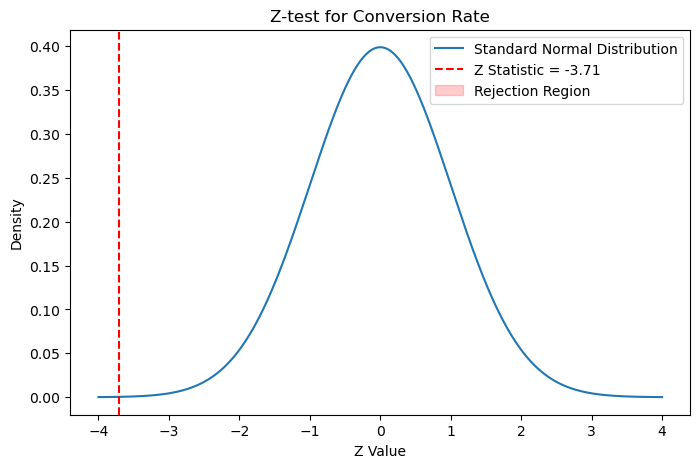

In [14]:
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

plt.figure(figsize=(8,5))
plt.plot(x, y, label='Standard Normal Distribution')
plt.axvline(z_stat, color='red', linestyle='--', label=f'Z Statistic = {z_stat:.2f}')
plt.fill_between(x, y, where=(x < -abs(z_stat)) | (x > abs(z_stat)), color='red', alpha=0.2, label='Rejection Region')
plt.title("Z-test for Conversion Rate")
plt.xlabel("Z Value")
plt.ylabel("Density")
plt.legend()
plt.show()
